## Problem Statement:
###### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [1]:
#importing necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pydotplus
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
#from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV #, LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#fetching data
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic=pd.read_csv(url)

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

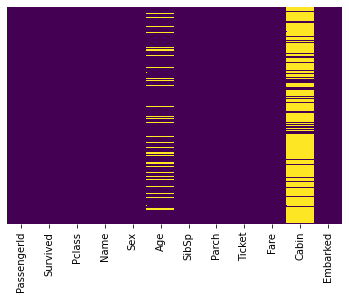

In [5]:
#Let us see null values graphically
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#we can see 20% of data is null near about in age column, we have to replace those values
#also cabin column has most of missing data, we have to drop it 
#

<AxesSubplot:xlabel='Survived', ylabel='count'>

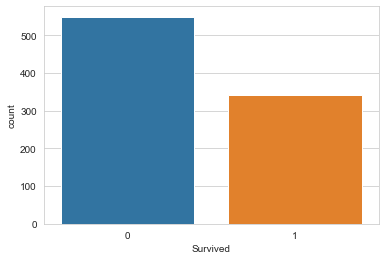

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)
#survived 0 suggests that the passenger could not survive in the accident 

<AxesSubplot:xlabel='Survived', ylabel='count'>

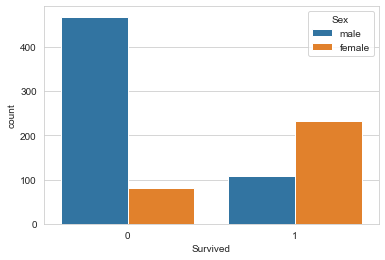

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [9]:
#above countplot suggests that more number of female survived in the titanic accident.

<AxesSubplot:xlabel='Survived', ylabel='count'>

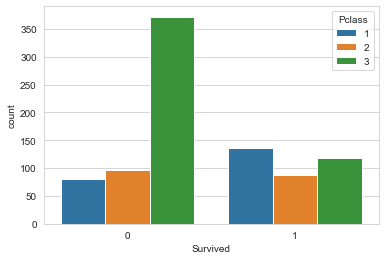

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic)

C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

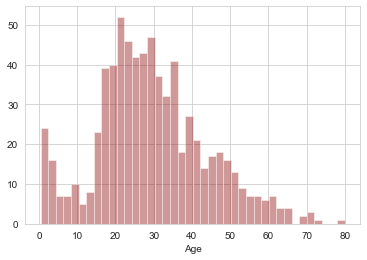

In [11]:
sns.distplot(titanic['Age'],kde=False,color='darkred',bins=40) #kernel density estimation

<AxesSubplot:xlabel='SibSp', ylabel='count'>

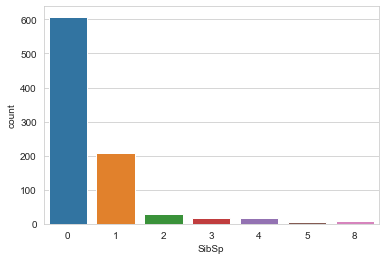

In [12]:
sns.countplot(x='SibSp',data=titanic)

<AxesSubplot:>

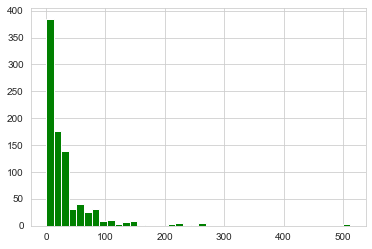

In [13]:
titanic['Fare'].hist(color='green',bins=40)

### Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

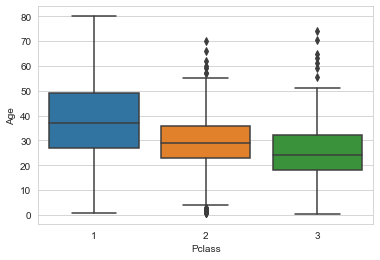

In [14]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [15]:
def clean_age(cols):
    Pclass=cols[0]
    Age=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
           return 24
    else:
        return Age

In [16]:
titanic['Age']=titanic[['Pclass','Age']].apply(clean_age,axis=1)

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

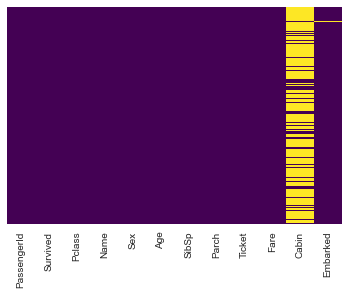

In [18]:
#Let us see null values again graphically
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:

#We have to drop this column Cabin as there are too many missing values in this
titanic.drop('Cabin',axis=1,inplace=True)  

<AxesSubplot:>

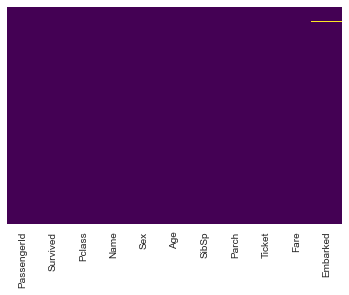

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
#still there is null value in Embarked
titanic['Embarked'].isnull().sum()

2

In [22]:
titanic['Embarked'].count()

889

<AxesSubplot:xlabel='Embarked', ylabel='count'>

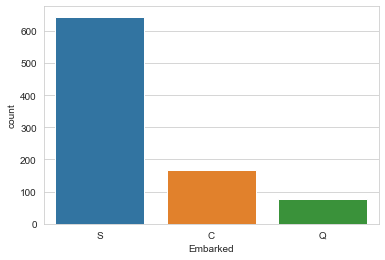

In [23]:
sns.countplot(x='Embarked',data=titanic)

In [24]:
titanic['Embarked'].fillna('S',inplace=True)

<AxesSubplot:>

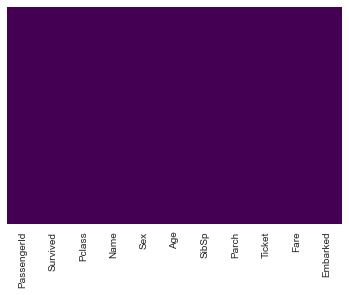

In [25]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
# Now we can see that all the null values have been handled successfully.

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

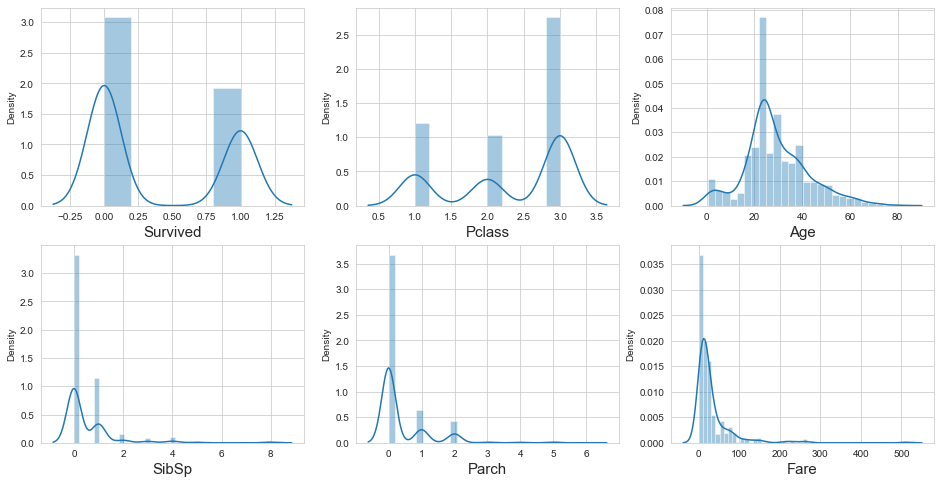

In [28]:
# let's see how data is distributed for every numerical column
cols=['Survived','Pclass','Age','SibSp','Parch','Fare']
plt.figure(figsize=(16,8), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [29]:
titanic.shape

(891, 11)

In [30]:
titan=titanic[titanic['Fare']<100]
titan.shape

(838, 11)

In [31]:
titan=titan[titan['Age']<70]
titan.shape

(831, 11)

In [32]:
#Let us check skewness
cols=['Age','SibSp','Parch','Fare']
for col in cols:
  print(titan[col].skew())

0.40160531933599464
3.739664972898732
3.000842641523939
1.6842161824287383


In [33]:
titan=titan[titan['SibSp']<3]
titan.shape

(788, 11)

<AxesSubplot:xlabel='Parch', ylabel='count'>

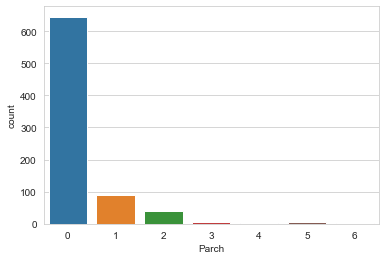

In [34]:
sns.countplot(x='Parch',data=titan)

<AxesSubplot:xlabel='Parch', ylabel='count'>

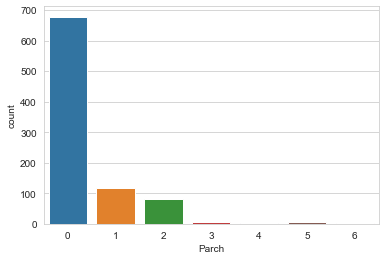

In [35]:
sns.countplot(x='Parch',data=titanic)

In [36]:
titan=titan[titan['Parch']<3]
titan.shape

(774, 11)

In [37]:
#Let us again check skewness
cols=['Age','SibSp','Parch','Fare']
for col in cols:
  print(titan[col].skew())

0.5106355966590234
1.5571779574502596
2.3678192771846174
1.8163452078214268


In [38]:
titan.shape

(774, 11)

In [39]:
#np.std(titan['Parch'])

In [40]:
#titan.skew(axis = 0, skipna = True)

In [41]:
#converting categorical features
pd.get_dummies(titan['Embarked'],drop_first=True).head(5)   #As two columns can represent the single category of Embarked class

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [42]:
sex=pd.get_dummies(titan['Sex'],drop_first=True)
embark=pd.get_dummies(titan['Embarked'],drop_first=True)

In [43]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [44]:
#remove those columns
titan.drop(columns=['PassengerId','Name','Sex','Ticket','Embarked','Parch'],axis=1,inplace=True)
titan

,Survived,Pclass,Age,SibSp,Fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,24.0,1,23.4500
889,1,1,26.0,0,30.0000


In [45]:
#concatenate those columns coming from categorical features
titan=pd.concat([titan,sex,embark],axis=1)

In [46]:
titan

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1
887,1,1,19.0,0,30.0000,0,0,1
888,0,3,24.0,1,23.4500,0,0,1
889,1,1,26.0,0,30.0000,1,0,0


In [74]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  774 non-null    int64  
 1   Pclass    774 non-null    int64  
 2   Age       774 non-null    float64
 3   SibSp     774 non-null    int64  
 4   Fare      774 non-null    float64
 5   sex       774 non-null    uint8  
 6   Q         774 non-null    uint8  
 7   S         774 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 38.5 KB


In [47]:
titan.rename(columns={'male':'sex'},inplace=True)
titan

,Survived,Pclass,Age,SibSp,Fare,sex,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,1,0,1
887,1,1,19.0,0,30.0000,0,0,1
888,0,3,24.0,1,23.4500,0,0,1
889,1,1,26.0,0,30.0000,1,0,0


In [69]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


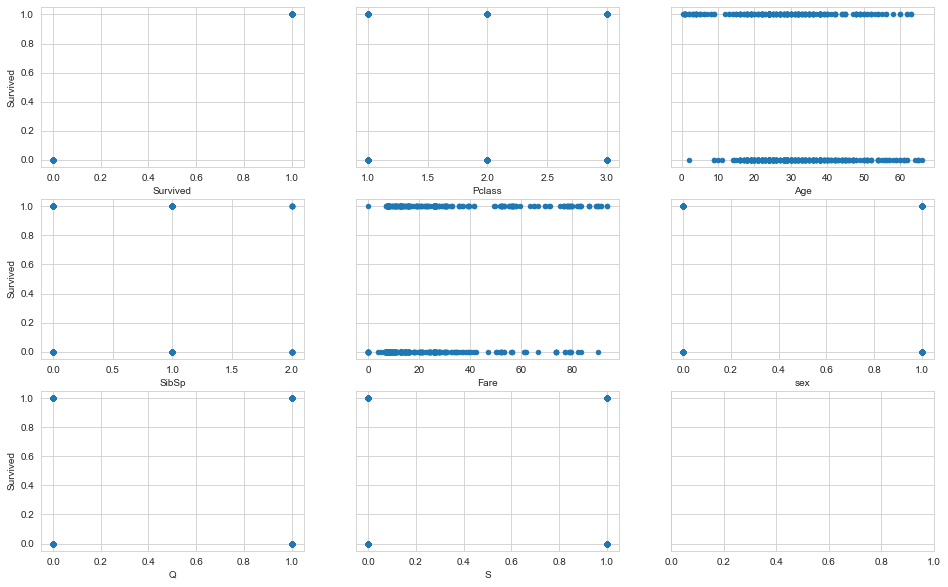

In [48]:
# visualize the relationship between the features and the response using scatterplots
fig, ax = plt.subplots(3,3,sharey=True)
i=0
for column in titan.columns:
    titan.plot.scatter(x=column,y='Survived',ax=ax[i//3][i%3], figsize=(16, 10))
    i+=1

In [49]:
X = titan.drop(columns = 'Survived')
y = titan['Survived']

In [50]:
y.unique()

array([0, 1], dtype=int64)

In [51]:
#scaling
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [50]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [51]:
vif

,VIF,Features
0,2.527762,Pclass
1,1.278558,Age
2,1.208257,SibSp
3,2.501949,Fare
4,1.107544,sex
5,1.502262,Q
6,1.452089,S


In [52]:
#Therefore there is no multicolinearity in features.

In [52]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 354)

In [53]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
clf.score(x_train,y_train)

0.9810344827586207

In [55]:
surv_pred = clf.predict(x_test)

In [56]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.8041237113402062

In [57]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = clf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:
adj_r2(x_train,y_train)

0.9808023872679045

In [59]:
adj_r2(x_test,y_test)

0.7967520230573107

In [60]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)

In [64]:
clf_load=pickle.load(open('modelForPrediction.sav','rb'))

In [68]:
clf_load.predict([[3,26.0,0,7.9250,0,0,1]])

array([1], dtype=int64)

dummies are here: sex---male 1 and female 0
                  embarked----S 0 1 , C 0 0  and Q  1 0

In [64]:
#There is a significant different in accuracy of training and testing data
98-79
#This indicates model overfitting.

19

## Let us apply Regularisation Technique there

In [65]:
#There are two regularisation technique for classification problem
#one is standaradisation and the other is PCA
#Let us scale our data for preprocessing
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.25, random_state= 355)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
clf.score(x_train,y_train)

0.9827586206896551

In [68]:
clf.score(x_test,y_test)

0.7989690721649485

##### Therefore this regularisation technique does not give better accuracy.Therefore we will not scale the data.Instead let us try PCA here.

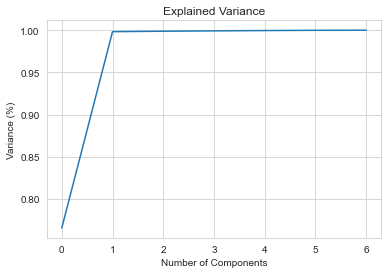

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

### We can see that around 100% of the variance is being explained by  2 components. So instead of giving all 8 columns as input in our algorithm let's use these 2 principal components instead.

In [74]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(X)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2'])#,'PC-3'])#,'PC-4','PC-5','PC-6','PC-7'])#,'PC-8'])

In [75]:
principal_x

,PC-1,PC-2
0,-15.310106,-4.235828
1,50.670888,-1.559121
2,-13.841876,-0.454723
3,32.263317,-0.800365
4,-11.899071,8.338132
...,...,...
769,-8.647924,-0.486887
770,6.401825,-11.765503
771,0.955944,-5.573971
772,7.818574,-4.909322


In [76]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.25, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()

In [77]:
clf.fit(x_train,y_train)
#clf.score(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
clf.score(x_test,y_test)

0.6701030927835051

In [75]:
#we will not use this(PCA) as score has not been improved.The graph also shows that it increases gradually.

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [76]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,30,1),
    'splitter' : ['best', 'random']
}

In [77]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [78]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [79]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 26, 'splitter': 'random'}


In [80]:
grid_search.best_score_

0.7344827586206896

In [81]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 4, min_samples_split= 26, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=26,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [82]:
clf.score(x_test,y_test)

0.6958762886597938

In [ ]:
#Here score has not been improved by hyperparameter tuning.
#Now we will use RandomForest Regressor here.

In [66]:
rand_clf = RandomForestClassifier(random_state=8)
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.8144329896907216

In [115]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.25, random_state= 355)

In [113]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.25, random_state= 355)

In [ ]:
# let's save the model
import pickle

with open('C://Users//user/iNeuron/Decision tree'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('C://Users//user/iNeuron/Decision tree'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('C://Users//user/iNeuron/Decision tree'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)

In [ ]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
#show graph
#Image(graph.create_png())